        MAIN_ID               RA           DEC      OTYPE
                           "h:m:s"       "d:m:s"         
----------------------- ------------- ------------- -----
2MASS J05343342+2200584 05 34 33.4274 +22 00 58.490  Star
        MAIN_ID               RA           DEC      OTYPE
                           "h:m:s"       "d:m:s"         
----------------------- ------------- ------------- -----
2MASS J05343217+2200560 05 34 32.1831 +22 00 56.008  Star
 MAIN_ID       RA        DEC    OTYPE
            "h:m:s"    "d:m:s"       
---------- ---------- --------- -----
Trimble 28 05 34 32.1 +22 00 56  Star
        MAIN_ID               RA           DEC      OTYPE
                           "h:m:s"       "d:m:s"         
----------------------- ------------- ------------- -----
2MASS J05343187+2201161 05 34 31.8813 +22 01 16.187  Star
        MAIN_ID               RA           DEC      OTYPE
                           "h:m:s"       "d:m:s"         
----------------------- ------------

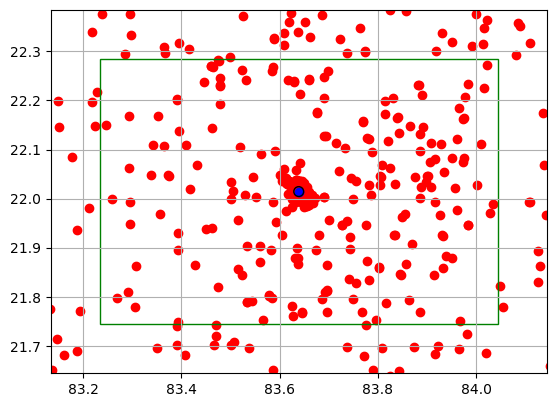

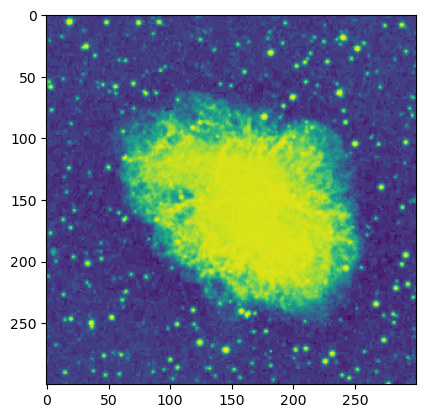

In [203]:
import matplotlib.pyplot as plt
from astroquery.simbad import Simbad
from astropy.coordinates import SkyCoord
from astroquery.skyview import SkyView
import astropy.units as u

from astropy.visualization import simple_norm


# these coordinates will be provided by the status API

# using m51 as an example
ra = 202.469575
dec = 47.1952583

target = SkyCoord(ra=ra, dec=dec, unit="deg", frame="icrs")
target = SkyCoord(ra=83.63888889, dec=22.01444444, unit='deg', frame='icrs')

# get image from database

image = SkyView.get_images(position=target, survey=["DSS"])[0][0]

# plt.imshow(image.data, origin='lower')


# get nearby objects

results = Simbad.query_region(target, radius=1 * u.deg)

Simbad.reset_votable_fields()
Simbad.add_votable_fields('otype')
count = 0

new_list = []
for r in results:
    if "Star" in r["OTYPE"]:
        print(r["MAIN_ID", "RA", "DEC", "OTYPE"])
        new_list.append(r["MAIN_ID", "RA", "DEC", "OTYPE"])



list = []
for r in results:

    new = SkyCoord(ra=r["RA"], dec=r["DEC"], unit=(u.hourangle, u.deg), frame="icrs")
    
    
    list.append((new, r["MAIN_ID"]))
  

print(list[0])
print(list[-1])





    
fig, ax = plt.subplots()
for l in list:
    
    ax.scatter(l[0].ra.deg, l[0].dec.deg, color='red')  
     
# for l in list:
#     ax.annotate(l[1], (l[0].ra.deg,l[0].dec.deg))
    
    
ax.scatter(target.ra.deg, target.dec.deg, color='blue')    
    
radius = 0.01
circle = plt.Circle( (target.ra.deg, target.dec.deg), radius, fill = False )    
    
ax.add_patch(circle)


rect = plt.Rectangle((target.ra.deg - 0.81/2, target.dec.deg - 0.54/2), 0.81, 0.54, linewidth=1, edgecolor='g', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)
    

ax.set_aspect('equal')  

# plt.xlim(target.ra.deg -radius, target.ra.deg +radius)
# plt.ylim(target.dec.deg -radius, target.dec.deg +radius)

xbox = 0.81/2 + 0.1
ybox = 0.54/2 + 0.1

plt.xlim(target.ra.deg -xbox, target.ra.deg +xbox)
plt.ylim(target.dec.deg -ybox, target.dec.deg +ybox)

plt.grid()
plt.show()


norm = simple_norm(image.data, 'asinh')
plt.imshow(image.data, norm=norm)

In [202]:
Simbad.reset_votable_fields()
Simbad.add_votable_fields('otype')
count = 0

new_list = []
for r in results:
    if "Star" in r["OTYPE"]:
        print(r["MAIN_ID", "RA", "DEC", "OTYPE"])
        new_list.append(r["MAIN_ID", "RA", "DEC", "OTYPE"])
        count += 1
print(count)


print(new_list)

        MAIN_ID               RA           DEC      OTYPE
                           "h:m:s"       "d:m:s"         
----------------------- ------------- ------------- -----
2MASS J05343342+2200584 05 34 33.4274 +22 00 58.490  Star
        MAIN_ID               RA           DEC      OTYPE
                           "h:m:s"       "d:m:s"         
----------------------- ------------- ------------- -----
2MASS J05343217+2200560 05 34 32.1831 +22 00 56.008  Star
 MAIN_ID       RA        DEC    OTYPE
            "h:m:s"    "d:m:s"       
---------- ---------- --------- -----
Trimble 28 05 34 32.1 +22 00 56  Star
        MAIN_ID               RA           DEC      OTYPE
                           "h:m:s"       "d:m:s"         
----------------------- ------------- ------------- -----
2MASS J05343187+2201161 05 34 31.8813 +22 01 16.187  Star
        MAIN_ID               RA           DEC      OTYPE
                           "h:m:s"       "d:m:s"         
----------------------- ------------